# Virgin Galactic Vs SpaceX Vs Blue Origin

### Step 1: Importing Libraries

In [1]:
import os                # For interacting with operating systems
import tweepy as tw      # Accessing Twitter API
import pandas as pd      # Data Analysis
import numpy as np       # For performing mathematical operations on arrays
import matplotlib.pyplot as plt   # For Visualization
import seaborn as sns    # For Visualization    
import re                # RegEx - used to work with Regular Expressions.
import nltk              # the module is used for Natural Language processing, along with some text processing libraries for tokenisation, stemming, etc.
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from textblob import TextBlob
import string
import snscrape.modules.twitter as sntwitter
from googletrans import Translator   #pip install googletrans==3.1.0a0

%matplotlib inline

* print(googletrans.LANGUAGES)
* translator = Translator()

### Step 2: Process of extracting tweets for each company

### Reference Code:
#using snscrape we will be scrapping tweet date, tweet_id, tweet for the specific keyword. 
#This gives out the most recent tweets for the keyword.

#tweets_fk = []
tweets_list1 = []

#for i,tweet in enumerate(sntwitter.TwitterSearchScraper('#virgin galactic lang:en since:2018-01-01 until:2021-09-06').get_items()):
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('#virgin galactic since:2018-01-01 until:2021-09-06').get_items()):
    if i > 100: # extracting 3500 keywords to for analysis
        break;
        
    #tweets_fk.append([tweet.date, tweet.id, tweet.content, tweet.lang])
    tweets_list1.append([tweet.date, tweet.id, tweet.content, tweet.url,\
                         tweet.user.username, tweet.user.followersCount,tweet.replyCount,\
                        tweet.retweetCount, tweet.likeCount, tweet.quoteCount, tweet.lang,\
                        tweet.outlinks, tweet.media, tweet.retweetedTweet, tweet.quotedTweet,\
                        tweet.inReplyToTweetId, tweet.inReplyToUser, tweet.mentionedUsers,\
                         tweet.coordinates, tweet.place, tweet.hashtags, tweet.cashtags])


#df_tw_fk = pd.DataFrame(tweets_fk, columns=['Datetime', 'Tweet_Id', 'text', 'language'])

### Extracting Tweets of company: Virgin Galactic

### Actual Codes:
#using snscrape we will be scrapping tweet date, tweet_id, tweet for the specific keyword. 
#This gives out the most recent tweets for the keyword.

tweets_vg = []

for i,tweet in enumerate(sntwitter.TwitterSearchScraper('#virgingalactic lang:en since:2018-01-01 until:2021-09-07').get_items()):
    if i > 3500: # extracting 4000 keywords to for analysis
        break;
        
    tweets_vg.append([tweet.date, tweet.id, tweet.content])
    

df_tw_vg = pd.DataFrame(tweets_vg, columns=['Datetime', 'Tweet_Id', 'text'])

df_tw_vg.head()

df_tw_vg.shape

* contents = df_tw_fk['text'].tolist()
* print(contents)
* result = translator.translate(contents, dest='en')
* df_tw_fk['text']

### Extracting Tweets of company: SpaceX

### Actual Code:
tweets_spacex = []

for i,tweet in enumerate(sntwitter.TwitterSearchScraper('#spacex lang:en since:2018-01-01 until:2021-09-07').get_items()):
    if i > 3500: # extracting 4000 keywords to for analysis
        break;
        
    tweets_spacex.append([tweet.date, tweet.id, tweet.content])
    

df_tw_spacex = pd.DataFrame(tweets_spacex, columns=['Datetime', 'Tweet_Id', 'text'])

df_tw_spacex.head()

df_tw_spacex.shape

### Extracting Tweets of company: Blue Origin

### Actual Code:
tweets_blueorigin = []

for i,tweet in enumerate(sntwitter.TwitterSearchScraper('#blueorigin lang:en since:2018-01-01 until:2021-09-07').get_items()):
    if i > 3500: # extracting 4000 keywords to for analysis
        break;
        
    tweets_blueorigin.append([tweet.date, tweet.id, tweet.content])
    

df_tw_blueorigin = pd.DataFrame(tweets_blueorigin, columns=['Datetime', 'Tweet_Id', 'text'])

df_tw_blueorigin.head()

df_tw_blueorigin.shape

### Saving the Virgin Galactic - SpaceX and Blue Origin tweets in csv

df_tw_vg.to_csv(r'C:\Users\RONALD\Desktop\IMS-Classroom\Python Code\Resume Project - ML Algo\Sentiment Analysis\Virgin Galactic_SpaceX_Blue Origin\tweet_vg.csv') 

df_tw_spacex.to_csv(r'C:\Users\RONALD\Desktop\IMS-Classroom\Python Code\Resume Project - ML Algo\Sentiment Analysis\Virgin Galactic_SpaceX_Blue Origin\tweet_spacex.csv') 

df_tw_blueorigin.to_csv(r'C:\Users\RONALD\Desktop\IMS-Classroom\Python Code\Resume Project - ML Algo\Sentiment Analysis\Virgin Galactic_SpaceX_Blue Origin\tweet_blueorigin.csv') 

### Get Data

In [2]:
tweets_vg = pd.read_csv(r'C:\Users\RONALD\Desktop\IMS-Classroom\Python Code\Resume Project - ML Algo\Sentiment Analysis\Virgin Galactic_SpaceX_Blue Origin\tweet_vg.csv')
tweets_vg.head()

,Unnamed: 0,Datetime,Tweet_Id,text
0,0,2021-09-06 23:59:39+00:00,1435029962621292545,@xqizitape @cryptodetecty @everyapetoken @safe...
1,1,2021-09-06 21:33:56+00:00,1434993294472327169,@netflix @elonmusk And now my #VirginGalactic ...
2,2,2021-09-06 21:17:05+00:00,1434989052755857410,#space #business NEW LINKS to BUSINESS in SPAC...
3,3,2021-09-06 19:21:20+00:00,1434959922173599744,@netflix This is really cool but have you hear...
4,4,2021-09-06 15:53:08+00:00,1434907528278724616,@Ford love the ad with the dig at perhaps #Vir...


In [3]:
tweets_spacex = pd.read_csv(r'C:\Users\RONALD\Desktop\IMS-Classroom\Python Code\Resume Project - ML Algo\Sentiment Analysis\Virgin Galactic_SpaceX_Blue Origin\tweet_spacex.csv')
tweets_spacex.head()

,Unnamed: 0,Datetime,Tweet_Id,text
0,0,2021-09-06 23:56:02+00:00,1435029053547888643,#ECT $ECT $ECT.ax Share buybacks were not in v...
1,1,2021-09-06 23:52:52+00:00,1435028257863131137,This is incredible. Now all we need is for @el...
2,2,2021-09-06 23:50:56+00:00,1435027771202342915,"Binance is secure and is leading the market, ..."
3,3,2021-09-06 23:44:34+00:00,1435026168592412673,If you call this journalism... #SpaceX https:...
4,4,2021-09-06 23:40:01+00:00,1435025022490271745,Good morning #crypto &amp; #SpaceX Fam! I gues...


In [4]:
tweets_bo = pd.read_csv(r'C:\Users\RONALD\Desktop\IMS-Classroom\Python Code\Resume Project - ML Algo\Sentiment Analysis\Virgin Galactic_SpaceX_Blue Origin\tweet_blueorigin.csv')
tweets_bo.head()

,Unnamed: 0,Datetime,Tweet_Id,text
0,0,2021-09-06 23:09:26+00:00,1435017326265389057,The Blue Origin lawsuit is going to delay the ...
1,1,2021-09-06 22:29:20+00:00,1435007235990687761,Why #space is the next frontier for #Cybersecu...
2,2,2021-09-06 21:17:05+00:00,1434989052755857410,#space #business NEW LINKS to BUSINESS in SPAC...
3,3,2021-09-06 21:01:34+00:00,1434985149335150592,House committee says yes to money for #SpaceX ...
4,4,2021-09-06 18:28:13+00:00,1434946553928687617,"@elonmusk musk uncle are there ghosts, devils..."


In [5]:
tweets_bo.columns

Index(['Unnamed: 0', 'Datetime', 'Tweet_Id', 'text'], dtype='object')

### Step 3: Applying Text preprocessing in company data

In [6]:
characterMap = {u'\u00E7': 'c', u'\u00C7' : 'C', u'\u011F' : 'g', u'\u011E' : 'G', 
                u'\u00F6': 'o', u'\u00D6' : 'O', u'\u015F' : 's', u'\u015E' : 'S', 
                u'\u00FC' : 'u', u'\u00DC' : 'U' , u'\u0131' : 'i', u'\u0049' : 'I', 
                u'\u0259' : 'e', u'\u018F' : 'E'}

In [7]:
# for removing punctuations from the text.
def remove_punctuation(text):  
    text_nopunt="".join([c for c in text if c not in string.punctuation])
    return text_nopunt

In [8]:
# for removing additional punctuations and non sensical text that was missed the first time around
def clean_text_round2(text, words):
    
    text =  re.sub(r"\b[a-zA-Z]\b", "", text)
    text =  re.sub(r"\b[a-zA-Z][a-zA-Z]\b", "", text)
    text =  re.sub("[^a-zA-Z]"," ",text)# Search for all non-letters # Replace all non-letters with spaces
    text =  " ".join(w for w in nltk.wordpunct_tokenize(text) if w.lower() in words or not w.isalpha())
    text =  re.sub(r' +', ' ',text)
    return text

In [9]:
# for lemmatization of text
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

In [10]:
def stem_lemma(df,txt):
    lemmatize_text = txt
    data['text'] = df.text.apply(lemmatize_text)
    data['text'] = data.text.apply(' '.join)
    
    return data;

In [11]:
# for text preprocessing
def text_preprocessing(data):
    
    # step 1: remove ascent letters
    data['text'] = (data['text'].astype("str")
                              .str.rstrip()   ## is used to remove extra white space
                              .replace(characterMap, regex=True)
                              .str.normalize('NFKD')
                              .str.encode('ascii', errors='ignore')
                              .str.decode('utf-8'))
    
    
    # Step 2: converting to lowercase
    data.text = data.text.str.lower()
    
    # Step 3: removing URL from data
    data['text'] = data['text'].str.replace(r'http\S+|www.\S+','',case=False)
    
    # Step 4: removing punctuation
    string.punctuation
    data['text']=data['text'].apply(lambda x : remove_punctuation(x))
    
    # Step 5: Removing numbers from data
    data['text'] = data['text'].str.replace('\d+', '')
    
    # Step 6: Removing stopwords from data
    nltk.download('stopwords')
    from nltk.corpus import stopwords
    stop = stopwords.words('english')
    data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    
    # Step 7: Replacing Similar codes in the data
    nltk.download('words')
    words = set(nltk.corpus.words.words())
    round2 = lambda x: clean_text_round2(x, words)
    data = pd.DataFrame(data.text.apply(round2))
    
    # Step 8: Applying Stemming and Lemmatisation
    from nltk.stem import PorterStemmer
    nltk.download('wordnet')
    # the most commonly used stemmer
    ps = PorterStemmer()
    w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
    lemmatizer = nltk.stem.WordNetLemmatizer()
    #data = stem_lemma(data, lemmatizer)
    def lemmatize_text(text):
        return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]
    
    data['text'] = data.text.apply(lemmatize_text)
    data['text'] = data.text.apply(' '.join)
    
    # Step 9: Strip Extra Whitespaces
    data['text'] = (data['text'].astype("str").str.rstrip())
    
    return data;


In [12]:
data_vg = text_preprocessing(tweets_vg)
data_vg.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RONALD\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\RONALD\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\RONALD\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text
0,one lucky holder token also space board billio...
1,worth nothing
2,space business new link business space
3,really cool one lucky holder token also space ...
4,ford love dig perhaps space elite going space ...


In [13]:
data_spacex = text_preprocessing(tweets_spacex)
data_spacex.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RONALD\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\RONALD\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\RONALD\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text
0,share vain thats big thats future follow twitter
1,incredible need start transporting watch live ...
2,secure leading market trade sign link tron tra...
3,call journalism
4,good morning fam guess mention birthday today ...


In [14]:
data_bo = text_preprocessing(tweets_bo)
data_bo.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RONALD\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\RONALD\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\RONALD\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text
0,blue origin lawsuit going delay first moon lan...
1,space next frontier like like outer space seem...
2,space business new link business space
3,house committee yes money lunar lander program...
4,musk uncle could please tell


### Step 4: Preparing Word Cloud on each company data

##### Document Term Matrix

In [15]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
# preparing the document term matrix for identifying most frequent words in the collection of text
def doc_term_matrix(data):
    
    cv = CountVectorizer(stop_words='english')
    data_cv = cv.fit_transform(data.text)
    data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())

    # One of the required inputs is a term-document matrix
    tdm = data_dtm.transpose()

    tdm['freq'] = tdm.sum(axis=1)
    
    tdm.reset_index(inplace=True)
    
    tdm1=tdm[["index","freq"]]
    tdm1.rename(columns = {'index':'Word'}, inplace = True)
    tdm1.sort_values(by='freq',ascending=False,inplace=True)
    
    return tdm1;

In [17]:
# Function to plot bar-graph for visualization of most frequent words
def plot_bar(df):
    tdm1 = doc_term_matrix(df)
    
    w = tdm1[tdm1['freq'] >=150] 
    
    fg = sns.factorplot(x='Word', y='freq',
                        size=6,  aspect=2,
                        kind='bar', 
                        data=w)

In [18]:
# Function to form word-cloud on tweets collected
def plot_wordcloud(df_competitor):
    text = " ".join(review for review in df_competitor.text)
    print ("There are {} words in the combination of all review.".format(len(text)))
    

    wordcloud = WordCloud(background_color="white",max_words=2000,collocations=False).generate(text)
    plt.figure(figsize=[15,27])
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

C:\Users\RONALD\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-16-056d648ca608>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdm1.sort_values(by='freq',ascending=False,inplace=True)
C:\Users\RONALD\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\R

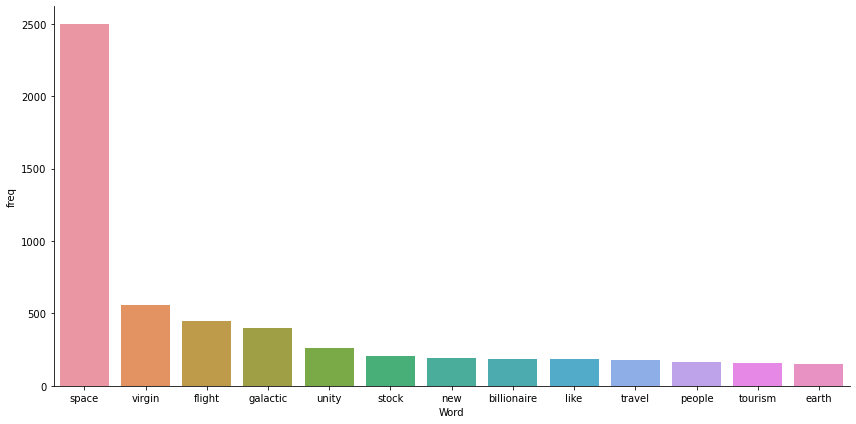

In [19]:
plot_bar(data_vg)

There are 195454 words in the combination of all review.


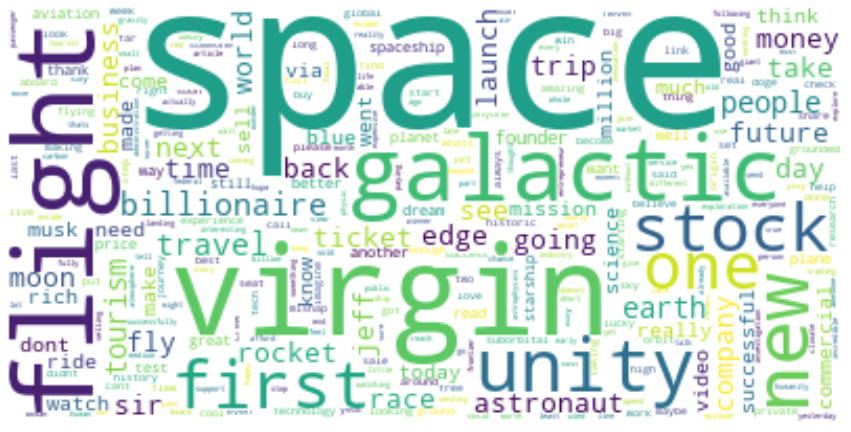

In [20]:
plot_wordcloud(data_vg)

In [21]:
freq_words=doc_term_matrix(data_vg)
freq_words.head()

<ipython-input-16-056d648ca608>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdm1.sort_values(by='freq',ascending=False,inplace=True)


,Word,freq
3100,space,2495
3622,virgin,557
1340,flight,448
1429,galactic,396
3536,unity,259


In [22]:
freq_words.head(15)

,Word,freq
3100,space,2495
3622,virgin,557
1340,flight,448
1429,galactic,396
3536,unity,259
3194,stock,203
2209,new,193
331,billionaire,188
1932,like,183
3450,travel,180


#### WordCloud on SpaceX

C:\Users\RONALD\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-16-056d648ca608>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdm1.sort_values(by='freq',ascending=False,inplace=True)
C:\Users\RONALD\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\R

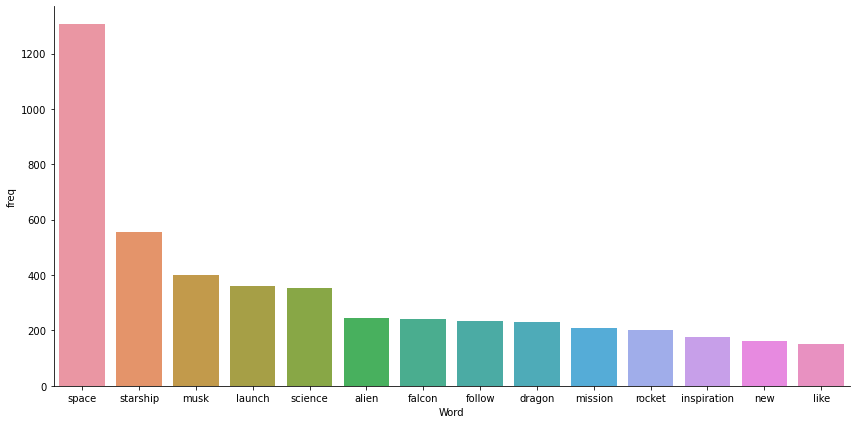

In [23]:
plot_bar(data_spacex)

There are 168687 words in the combination of all review.


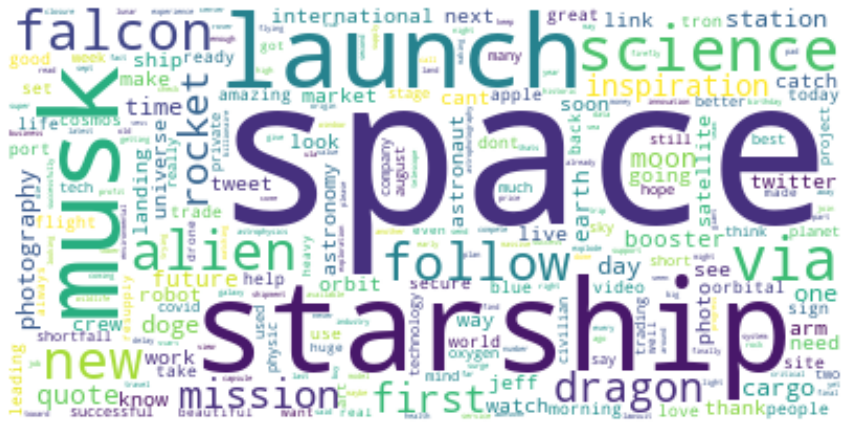

In [24]:
plot_wordcloud(data_spacex)

In [25]:
freq_words_fk = doc_term_matrix(data_spacex)

<ipython-input-16-056d648ca608>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdm1.sort_values(by='freq',ascending=False,inplace=True)


In [26]:
freq_words_fk.head(15)

,Word,freq
2839,space,1305
2893,starship,557
1993,musk,399
1727,launch,360
2651,science,354
93,alien,246
1128,falcon,242
1228,follow,235
931,dragon,232
1954,mission,209


#### WordCloud on Blue Origin

C:\Users\RONALD\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-16-056d648ca608>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdm1.sort_values(by='freq',ascending=False,inplace=True)
C:\Users\RONALD\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\R

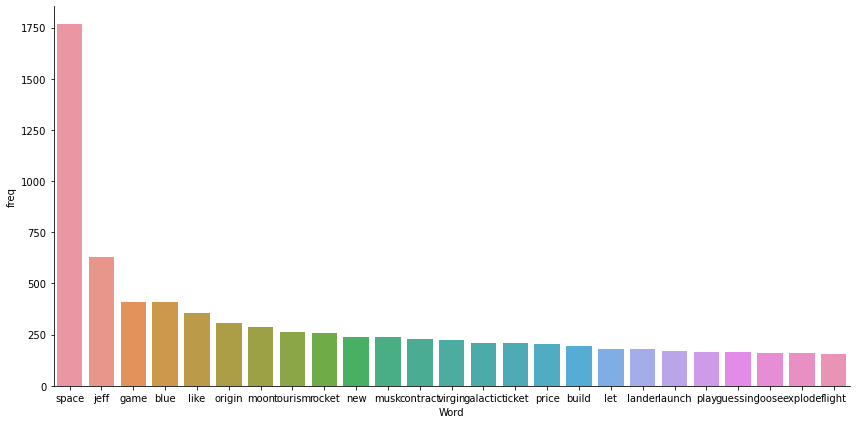

In [27]:
plot_bar(data_bo)

There are 193250 words in the combination of all review.


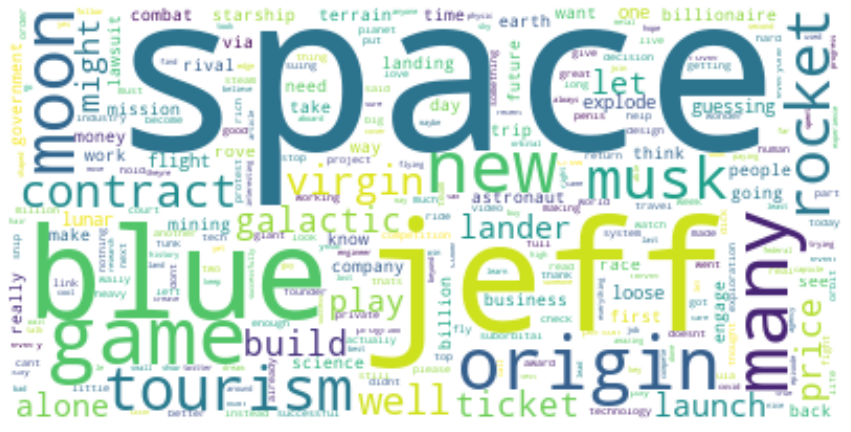

In [28]:
plot_wordcloud(data_bo)

In [29]:
freq_words_bo = doc_term_matrix(data_bo)

<ipython-input-16-056d648ca608>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdm1.sort_values(by='freq',ascending=False,inplace=True)


In [30]:
freq_words_bo.head(15)

,Word,freq
3029,space,1765
1788,jeff,631
1408,game,409
336,blue,409
1912,like,358
2257,origin,307
2120,moon,285
3346,tourism,263
2764,rocket,260
2168,new,239


### Step 5: Sentiment Analysis on each company data

In [31]:
def check_sentiments(competitor_data):
    pol = lambda x: TextBlob(x).sentiment.polarity
    competitor_data['polarity'] = competitor_data['text'].apply(pol) #adding a column polarity with values
    
    #adding another column 'Sentiment' which represents the tweet being positive or negative
    competitor_data['Sentiment'] = np.where(competitor_data['polarity']>=0, 'Positive', 'Negative')     
    
    #adding another column 'Sentiment2' which represents the tweet being positive, negative and neutral
    competitor_data['Sentiment2'] = np.where(competitor_data.polarity< 0, 'Negative', np.where(competitor_data.polarity> 0,'Positive', 'Neutral'))
    
    return competitor_data;

In [32]:
final_data_vg = check_sentiments(data_vg)

In [33]:
final_data_vg.tail()

,text,polarity,Sentiment,Sentiment2
3496,hilarious virgin galactic hit major milestone ...,0.203125,Positive,Positive
3497,sir first travel outer space floating around b...,0.250000,Positive,Positive
3498,equally,0.000000,Positive,Neutral
3499,musk virgin galactic ticket trip space report ...,0.000000,Positive,Neutral
3500,unity watch spark excitement space,0.000000,Positive,Neutral


In [34]:
final_data_vg.Sentiment.value_counts()

Positive    3151
Negative     350
Name: Sentiment, dtype: int64

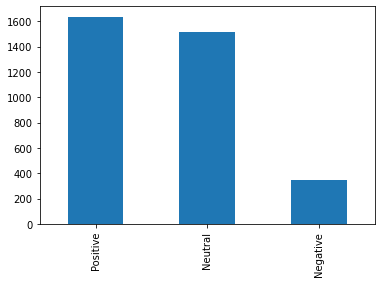

In [35]:
final_data_vg.Sentiment2.value_counts().plot.bar()

In [36]:
final_data_vg.Sentiment2.value_counts()

Positive    1636
Neutral     1515
Negative     350
Name: Sentiment2, dtype: int64

In [37]:
final_data_spacex = check_sentiments(data_spacex)

In [38]:
final_data_spacex.tail()

,text,polarity,Sentiment,Sentiment2
3496,stop shopping everyone cancel prime play stupid,-0.80,Negative,Negative
3497,trying make earth better place human brother t...,0.25,Positive,Positive
3498,day logo everywhere doge moon gem,0.00,Positive,Neutral
3499,building tweet release begin big marketing dog...,0.00,Positive,Neutral
3500,jeff retired pursue job filing musk via,0.00,Positive,Neutral


In [39]:
final_data_spacex.Sentiment.value_counts()

Positive    3017
Negative     484
Name: Sentiment, dtype: int64

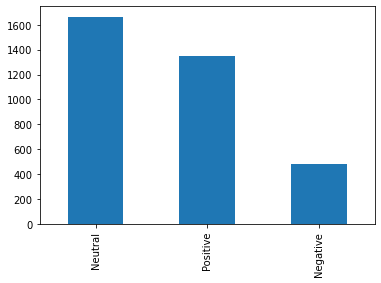

In [40]:
final_data_spacex.Sentiment2.value_counts().plot.bar()

In [41]:
final_data_spacex.Sentiment2.value_counts()

Neutral     1664
Positive    1353
Negative     484
Name: Sentiment2, dtype: int64

In [42]:
final_data_bo = check_sentiments(data_bo)

In [43]:
final_data_bo.tail()

,text,polarity,Sentiment,Sentiment2
3496,fire remark million rich dont get touch tech n...,0.375,Positive,Positive
3497,jeff level confidence product build test first...,0.125,Positive,Positive
3498,much billionaire space race got figured,0.200,Positive,Positive
3499,really tired hearing,-0.400,Negative,Negative
3500,must beach boardwalk think get thrill,0.000,Positive,Neutral


In [44]:
final_data_bo.Sentiment.value_counts()

Positive    2838
Negative     663
Name: Sentiment, dtype: int64

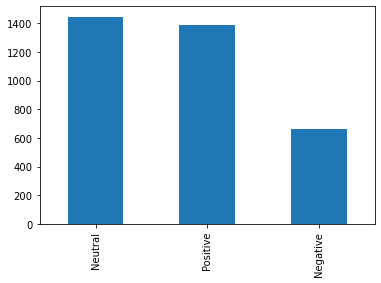

In [45]:
final_data_bo.Sentiment2.value_counts().plot.bar()

In [46]:
final_data_bo.Sentiment2.value_counts()

Neutral     1446
Positive    1392
Negative     663
Name: Sentiment2, dtype: int64

In [47]:
tarin

NameError: name 'tarin' is not defined

### Rule Based Sentiment Analysis (Method II) - usng vaderSentiment

https://www.analyticsvidhya.com/blog/2021/06/rule-based-sentiment-analysis-in-python/

In [49]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# function to calculate vader sentiment
def vadersentimentanalysis(tweet):
    vs = analyzer.polarity_scores(tweet)
    return vs['compound']
    

    # function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'

final_data_vg['Vader_Sentiment'] = final_data_vg['text'].apply(vadersentimentanalysis)
final_data_vg['Vader_Analysis'] = final_data_vg['Vader_Sentiment'].apply(vader_analysis)
final_data_vg.head()

,text,polarity,Sentiment,Sentiment2,Vader_Sentiment,Vader_Analysis
0,one lucky holder token also space board billio...,0.333333,Positive,Positive,0.7351,Positive
1,worth nothing,0.300000,Positive,Positive,0.2263,Neutral
2,space business new link business space,0.136364,Positive,Positive,0.0000,Neutral
3,really cool one lucky holder token also space ...,0.341667,Positive,Positive,0.8425,Positive
4,ford love dig perhaps space elite going space ...,0.250000,Positive,Positive,0.6369,Positive


In [50]:
vader_counts = final_data_vg['Vader_Analysis'].value_counts()
vader_counts

Neutral     2573
Positive     800
Negative     128
Name: Vader_Analysis, dtype: int64

### Rule Based Sentiment Analysis (Method III) - using SentiWordNet

nltk.download('sentiwordnet')
from nltk.corpus import sentiwordnet as swn

def sentiwordnetanalysis(pos_data):
    sentiment = 0
    tokens_count = 0
    for word, pos in pos_data:
        if not pos:
            continue
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        if not lemma:
            continue
            synsets = wordnet.synsets(lemma, pos=pos)
        if not synsets:
            continue
            # Take the first sense, the most common
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            sentiment += swn_synset.pos_score() - swn_synset.neg_score()
            tokens_count += 1
            # print(swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score())
        if not tokens_count:
            return 0
        if sentiment>0:
            return "Positive"
        if sentiment==0:
            return "Neutral"
        else:
            return "Negative"

final_data_vg['SWN analysis'] = mydata['POS tagged'].apply(sentiwordnetanalysis)
final_data_vg.head()

swn_counts= final_data_vg['SWN analysis'].value_counts()
swn_counts

https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk?utm_source=adwords_ppc&utm_medium=cpc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=&utm_network=g&utm_adpostion=&utm_creative=332602034358&utm_targetid=aud-299261629574:dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=9062215&gclid=Cj0KCQiAqvaNBhDLARIsAH1Pq53uqtYiqUgrguieWgKqETtmQYpaGYNerCPEwMOXO2Up8hh39XBZWqsaAsAaEALw_wcB

### Conclusion: